# 분류실습1 - 캐글 산탄데르 고객 만족 예측

370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측
- TARGET == 1 : 불만 가진 고객
- TARGET == 0 : 만족 고객
- 평가지표: ROC-AUC (대부분이 만족이기 때문)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./data/train.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:,-1]
print(X_features.shape)

(76020, 369)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGB 학습과 하이퍼파라미터 튜닝

### 학습 & AUC값 계산

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

### 하이퍼파라미터 튜닝

__<학습시간이 많이 필요한 모델의 하이퍼파라미터 튜닝 팁>__
- 먼저 2~3개 정도의 파라미터를 결합해 최적 파라미터를 찾아낸 뒤에 이 최적 파라미터를 기반으로 다른 파라미터를 결합해 튜닝을 수행

In [13]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.82674

[51]	validation_0-auc:0.86387	validation_1-auc:0.843007
[52]	validation_0-auc:0.864428	validation_1-auc:0.843608
[53]	validation_0-auc:0.86492	validation_1-auc:0.843887
[54]	validation_0-auc:0.865341	validation_1-auc:0.844128
[55]	validation_0-auc:0.865713	validation_1-auc:0.843955
[56]	validation_0-auc:0.866165	validation_1-auc:0.844301
[57]	validation_0-auc:0.866538	validation_1-auc:0.84439
[58]	validation_0-auc:0.86671	validation_1-auc:0.844055
[59]	validation_0-auc:0.866977	validation_1-auc:0.843974
[60]	validation_0-auc:0.867483	validation_1-auc:0.8439
[61]	validation_0-auc:0.867853	validation_1-auc:0.843561
[62]	validation_0-auc:0.86811	validation_1-auc:0.843594
[63]	validation_0-auc:0.868319	validation_1-auc:0.843498
[64]	validation_0-auc:0.868554	validation_1-auc:0.843615
[65]	validation_0-auc:0.869021	validation_1-auc:0.843756
[66]	validation_0-auc:0.869095	validation_1-auc:0.843781
[67]	validation_0-auc:0.869277	validation_1-auc:0.843635
[68]	validation_0-auc:0.869639	validat

[1]	validation_0-auc:0.804027	validation_1-auc:0.809028
[2]	validation_0-auc:0.796929	validation_1-auc:0.805684
[3]	validation_0-auc:0.80379	validation_1-auc:0.811591
[4]	validation_0-auc:0.811904	validation_1-auc:0.818375
[5]	validation_0-auc:0.808826	validation_1-auc:0.815714
[6]	validation_0-auc:0.809236	validation_1-auc:0.816054
[7]	validation_0-auc:0.818354	validation_1-auc:0.823376
[8]	validation_0-auc:0.822085	validation_1-auc:0.826164
[9]	validation_0-auc:0.82165	validation_1-auc:0.824633
[10]	validation_0-auc:0.825876	validation_1-auc:0.828152
[11]	validation_0-auc:0.830307	validation_1-auc:0.830536
[12]	validation_0-auc:0.832494	validation_1-auc:0.831414
[13]	validation_0-auc:0.832283	validation_1-auc:0.831058
[14]	validation_0-auc:0.830152	validation_1-auc:0.829388
[15]	validation_0-auc:0.833723	validation_1-auc:0.831545
[16]	validation_0-auc:0.835902	validation_1-auc:0.833087
[17]	validation_0-auc:0.838024	validation_1-auc:0.835309
[18]	validation_0-auc:0.840344	validation_

[57]	validation_0-auc:0.863066	validation_1-auc:0.845717
[58]	validation_0-auc:0.863413	validation_1-auc:0.845678
[59]	validation_0-auc:0.863608	validation_1-auc:0.84581
[60]	validation_0-auc:0.86412	validation_1-auc:0.845891
[61]	validation_0-auc:0.864399	validation_1-auc:0.845775
[62]	validation_0-auc:0.864521	validation_1-auc:0.845851
[63]	validation_0-auc:0.864786	validation_1-auc:0.845721
[64]	validation_0-auc:0.865062	validation_1-auc:0.845821
[65]	validation_0-auc:0.865567	validation_1-auc:0.845831
[66]	validation_0-auc:0.865616	validation_1-auc:0.845926
[67]	validation_0-auc:0.865942	validation_1-auc:0.845591
[68]	validation_0-auc:0.866071	validation_1-auc:0.845562
[69]	validation_0-auc:0.866158	validation_1-auc:0.845375
[70]	validation_0-auc:0.866421	validation_1-auc:0.845291
[71]	validation_0-auc:0.866631	validation_1-auc:0.845063
[72]	validation_0-auc:0.866834	validation_1-auc:0.844927
[73]	validation_0-auc:0.867035	validation_1-auc:0.844978
[74]	validation_0-auc:0.867128	va

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.809965	validation_1-auc:0.808886
[2]	validation_0-auc:0.804423	validation_1-auc:0.807373
[3]	validation_0-auc:0.815189	validation_1-auc:0.816603
[4]	validation_0-auc:0.824234	validation_1-auc:0.823278
[5]	validation_0-auc:0.819568	validation_1-auc:0.81934
[6]	validation_0-auc:0.819199	validation_1-auc:0.818772
[7]	validation_0-auc:0.827364	validation_1-auc:0.826183
[8]	validation_0-auc:0.831947	validation_1-auc:0.829293
[9]	validation_0-auc:0.832248	validation_1-auc:0.827116
[10]	validation_0-auc:0.836511	validation_1-auc:0.829685
[11]	validation_0-auc:0.841032	validation_1-auc:0.831312
[12]	validation_0-auc:0.843673	validation_1-auc:0.831989
[13]	validation_0-auc:0.843697	validation_1-auc:0.832132
[14]	validation_0-auc:0.843356	validation_1-auc:0.830392
[15]	validation_0-auc:0.846759	validation_1-auc:0.83237

[77]	validation_0-auc:0.892957	validation_1-auc:0.844356
[78]	validation_0-auc:0.893228	validation_1-auc:0.84433
[79]	validation_0-auc:0.893375	validation_1-auc:0.844108
[80]	validation_0-auc:0.893476	validation_1-auc:0.844037
[81]	validation_0-auc:0.893656	validation_1-auc:0.844067
[82]	validation_0-auc:0.893838	validation_1-auc:0.843845
[83]	validation_0-auc:0.894993	validation_1-auc:0.84388
[84]	validation_0-auc:0.895174	validation_1-auc:0.843781
[85]	validation_0-auc:0.895171	validation_1-auc:0.844018
[86]	validation_0-auc:0.895293	validation_1-auc:0.843721
[87]	validation_0-auc:0.895377	validation_1-auc:0.843689
[88]	validation_0-auc:0.895614	validation_1-auc:0.8435
[89]	validation_0-auc:0.895597	validation_1-auc:0.84341
[90]	validation_0-auc:0.896023	validation_1-auc:0.843738
[91]	validation_0-auc:0.896194	validation_1-auc:0.843675
[92]	validation_0-auc:0.896304	validation_1-auc:0.843666
[93]	validation_0-auc:0.896388	validation_1-auc:0.8436
[94]	validation_0-auc:0.89645	validati

[17]	validation_0-auc:0.85058	validation_1-auc:0.835537
[18]	validation_0-auc:0.852488	validation_1-auc:0.836913
[19]	validation_0-auc:0.851413	validation_1-auc:0.83678
[20]	validation_0-auc:0.853824	validation_1-auc:0.837786
[21]	validation_0-auc:0.853711	validation_1-auc:0.836986
[22]	validation_0-auc:0.852989	validation_1-auc:0.835059
[23]	validation_0-auc:0.855112	validation_1-auc:0.836803
[24]	validation_0-auc:0.856859	validation_1-auc:0.838802
[25]	validation_0-auc:0.85723	validation_1-auc:0.83782
[26]	validation_0-auc:0.857535	validation_1-auc:0.836375
[27]	validation_0-auc:0.85929	validation_1-auc:0.837784
[28]	validation_0-auc:0.860972	validation_1-auc:0.837979
[29]	validation_0-auc:0.860682	validation_1-auc:0.837827
[30]	validation_0-auc:0.862143	validation_1-auc:0.838806
[31]	validation_0-auc:0.863184	validation_1-auc:0.839024
[32]	validation_0-auc:0.863638	validation_1-auc:0.838132
[33]	validation_0-auc:0.864268	validation_1-auc:0.838288
[34]	validation_0-auc:0.8644	validat

Stopping. Best iteration:
[65]	validation_0-auc:0.882333	validation_1-auc:0.843298

[0]	validation_0-auc:0.740963	validation_1-auc:0.745305
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.82294	validation_1-auc:0.821542
[2]	validation_0-auc:0.813813	validation_1-auc:0.809933
[3]	validation_0-auc:0.827473	validation_1-auc:0.822227
[4]	validation_0-auc:0.832393	validation_1-auc:0.826685
[5]	validation_0-auc:0.831888	validation_1-auc:0.822684
[6]	validation_0-auc:0.831945	validation_1-auc:0.821011
[7]	validation_0-auc:0.835043	validation_1-auc:0.824823
[8]	validation_0-auc:0.839917	validation_1-auc:0.82833
[9]	validation_0-auc:0.839675	validation_1-auc:0.827635
[10]	validation_0-auc:0.843606	validation_1-auc:0.829718
[11]	validation_0-auc:0.846078	validation_1-auc:0.833888
[12]	validation_0-auc:0.848075	validation_1-auc:0.834836
[13]	validation_0-auc:0.849433

[45]	validation_0-auc:0.860625	validation_1-auc:0.839082
[46]	validation_0-auc:0.860953	validation_1-auc:0.839125
[47]	validation_0-auc:0.861608	validation_1-auc:0.838995
[48]	validation_0-auc:0.862085	validation_1-auc:0.839059
[49]	validation_0-auc:0.862354	validation_1-auc:0.839387
[50]	validation_0-auc:0.862812	validation_1-auc:0.839298
[51]	validation_0-auc:0.863372	validation_1-auc:0.839127
[52]	validation_0-auc:0.864029	validation_1-auc:0.839097
[53]	validation_0-auc:0.864379	validation_1-auc:0.839118
[54]	validation_0-auc:0.864775	validation_1-auc:0.838848
[55]	validation_0-auc:0.86518	validation_1-auc:0.838897
[56]	validation_0-auc:0.865428	validation_1-auc:0.838671
[57]	validation_0-auc:0.865679	validation_1-auc:0.838451
[58]	validation_0-auc:0.866057	validation_1-auc:0.838382
[59]	validation_0-auc:0.866205	validation_1-auc:0.838363
[60]	validation_0-auc:0.866485	validation_1-auc:0.83804
[61]	validation_0-auc:0.866681	validation_1-auc:0.837604
[62]	validation_0-auc:0.867	valid

[17]	validation_0-auc:0.844972	validation_1-auc:0.836283
[18]	validation_0-auc:0.845411	validation_1-auc:0.836243
[19]	validation_0-auc:0.845623	validation_1-auc:0.837443
[20]	validation_0-auc:0.846563	validation_1-auc:0.837309
[21]	validation_0-auc:0.846794	validation_1-auc:0.837453
[22]	validation_0-auc:0.847843	validation_1-auc:0.837781
[23]	validation_0-auc:0.848615	validation_1-auc:0.838383
[24]	validation_0-auc:0.849434	validation_1-auc:0.838103
[25]	validation_0-auc:0.85036	validation_1-auc:0.838932
[26]	validation_0-auc:0.850801	validation_1-auc:0.838703
[27]	validation_0-auc:0.850936	validation_1-auc:0.837935
[28]	validation_0-auc:0.851557	validation_1-auc:0.837842
[29]	validation_0-auc:0.852139	validation_1-auc:0.837859
[30]	validation_0-auc:0.852693	validation_1-auc:0.8387
[31]	validation_0-auc:0.853579	validation_1-auc:0.838874
[32]	validation_0-auc:0.853998	validation_1-auc:0.838908
[33]	validation_0-auc:0.85455	validation_1-auc:0.839699
[34]	validation_0-auc:0.855415	vali

[59]	validation_0-auc:0.862575	validation_1-auc:0.839266
[60]	validation_0-auc:0.862755	validation_1-auc:0.839195
[61]	validation_0-auc:0.86307	validation_1-auc:0.839449
[62]	validation_0-auc:0.863241	validation_1-auc:0.839404
[63]	validation_0-auc:0.863658	validation_1-auc:0.839428
[64]	validation_0-auc:0.86375	validation_1-auc:0.839621
[65]	validation_0-auc:0.86421	validation_1-auc:0.839633
[66]	validation_0-auc:0.86447	validation_1-auc:0.839787
[67]	validation_0-auc:0.86483	validation_1-auc:0.839489
[68]	validation_0-auc:0.864976	validation_1-auc:0.839477
[69]	validation_0-auc:0.865145	validation_1-auc:0.83945
Stopping. Best iteration:
[39]	validation_0-auc:0.855169	validation_1-auc:0.840194

[0]	validation_0-auc:0.811089	validation_1-auc:0.810522
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816087	validation_1-auc:0.810073
[2]	validation_0-auc:0.822

[27]	validation_0-auc:0.85049	validation_1-auc:0.838129
[28]	validation_0-auc:0.850674	validation_1-auc:0.837812
[29]	validation_0-auc:0.851227	validation_1-auc:0.838234
[30]	validation_0-auc:0.851623	validation_1-auc:0.838185
[31]	validation_0-auc:0.852504	validation_1-auc:0.838433
[32]	validation_0-auc:0.853015	validation_1-auc:0.838103
[33]	validation_0-auc:0.8536	validation_1-auc:0.838398
[34]	validation_0-auc:0.854335	validation_1-auc:0.838896
[35]	validation_0-auc:0.854663	validation_1-auc:0.839009
[36]	validation_0-auc:0.855138	validation_1-auc:0.839035
[37]	validation_0-auc:0.855351	validation_1-auc:0.839193
[38]	validation_0-auc:0.856105	validation_1-auc:0.839668
[39]	validation_0-auc:0.856527	validation_1-auc:0.83972
[40]	validation_0-auc:0.857019	validation_1-auc:0.840403
[41]	validation_0-auc:0.8577	validation_1-auc:0.840506
[42]	validation_0-auc:0.85823	validation_1-auc:0.840863
[43]	validation_0-auc:0.858341	validation_1-auc:0.840702
[44]	validation_0-auc:0.858849	validat

[4]	validation_0-auc:0.83547	validation_1-auc:0.826685
[5]	validation_0-auc:0.840865	validation_1-auc:0.832065
[6]	validation_0-auc:0.843256	validation_1-auc:0.831047
[7]	validation_0-auc:0.844488	validation_1-auc:0.82997
[8]	validation_0-auc:0.846035	validation_1-auc:0.83064
[9]	validation_0-auc:0.847946	validation_1-auc:0.831142
[10]	validation_0-auc:0.848745	validation_1-auc:0.831627
[11]	validation_0-auc:0.850347	validation_1-auc:0.832598
[12]	validation_0-auc:0.851272	validation_1-auc:0.832519
[13]	validation_0-auc:0.853669	validation_1-auc:0.834865
[14]	validation_0-auc:0.855251	validation_1-auc:0.835849
[15]	validation_0-auc:0.856435	validation_1-auc:0.83605
[16]	validation_0-auc:0.857587	validation_1-auc:0.836177
[17]	validation_0-auc:0.859351	validation_1-auc:0.836231
[18]	validation_0-auc:0.860285	validation_1-auc:0.836331
[19]	validation_0-auc:0.860357	validation_1-auc:0.837599
[20]	validation_0-auc:0.862392	validation_1-auc:0.83764
[21]	validation_0-auc:0.862808	validation_

[63]	validation_0-auc:0.89141	validation_1-auc:0.841085
[64]	validation_0-auc:0.891682	validation_1-auc:0.841143
[65]	validation_0-auc:0.892278	validation_1-auc:0.841065
[66]	validation_0-auc:0.892727	validation_1-auc:0.840958
[67]	validation_0-auc:0.893137	validation_1-auc:0.840921
[68]	validation_0-auc:0.893388	validation_1-auc:0.840771
[69]	validation_0-auc:0.893529	validation_1-auc:0.84087
[70]	validation_0-auc:0.893802	validation_1-auc:0.840709
[71]	validation_0-auc:0.893855	validation_1-auc:0.840794
[72]	validation_0-auc:0.894019	validation_1-auc:0.840836
[73]	validation_0-auc:0.894373	validation_1-auc:0.841008
[74]	validation_0-auc:0.894542	validation_1-auc:0.840932
[75]	validation_0-auc:0.894724	validation_1-auc:0.840937
Stopping. Best iteration:
[45]	validation_0-auc:0.884335	validation_1-auc:0.842062

[0]	validation_0-auc:0.816109	validation_1-auc:0.811
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-a

[59]	validation_0-auc:0.882357	validation_1-auc:0.841579
[60]	validation_0-auc:0.882716	validation_1-auc:0.841512
[61]	validation_0-auc:0.882939	validation_1-auc:0.841415
[62]	validation_0-auc:0.883049	validation_1-auc:0.841426
[63]	validation_0-auc:0.883365	validation_1-auc:0.841612
[64]	validation_0-auc:0.883681	validation_1-auc:0.841852
[65]	validation_0-auc:0.884057	validation_1-auc:0.841847
[66]	validation_0-auc:0.884053	validation_1-auc:0.841909
[67]	validation_0-auc:0.88446	validation_1-auc:0.841985
[68]	validation_0-auc:0.884938	validation_1-auc:0.841768
[69]	validation_0-auc:0.885009	validation_1-auc:0.841656
[70]	validation_0-auc:0.885288	validation_1-auc:0.841626
[71]	validation_0-auc:0.885498	validation_1-auc:0.841288
[72]	validation_0-auc:0.885587	validation_1-auc:0.841334
[73]	validation_0-auc:0.885921	validation_1-auc:0.841217
[74]	validation_0-auc:0.886022	validation_1-auc:0.841253
[75]	validation_0-auc:0.886104	validation_1-auc:0.841179
[76]	validation_0-auc:0.886118	v

[19]	validation_0-auc:0.846482	validation_1-auc:0.838554
[20]	validation_0-auc:0.848726	validation_1-auc:0.840214
[21]	validation_0-auc:0.847695	validation_1-auc:0.838583
[22]	validation_0-auc:0.84676	validation_1-auc:0.838167
[23]	validation_0-auc:0.848966	validation_1-auc:0.83963
[24]	validation_0-auc:0.850153	validation_1-auc:0.840161
[25]	validation_0-auc:0.850518	validation_1-auc:0.838865
[26]	validation_0-auc:0.850326	validation_1-auc:0.83861
[27]	validation_0-auc:0.851898	validation_1-auc:0.839714
[28]	validation_0-auc:0.853439	validation_1-auc:0.83974
[29]	validation_0-auc:0.853446	validation_1-auc:0.840649
[30]	validation_0-auc:0.854315	validation_1-auc:0.840818
[31]	validation_0-auc:0.855389	validation_1-auc:0.841412
[32]	validation_0-auc:0.855959	validation_1-auc:0.841502
[33]	validation_0-auc:0.856346	validation_1-auc:0.841478
[34]	validation_0-auc:0.856286	validation_1-auc:0.841234
[35]	validation_0-auc:0.857969	validation_1-auc:0.842276
[36]	validation_0-auc:0.859291	vali

In [14]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

### Feature Importance

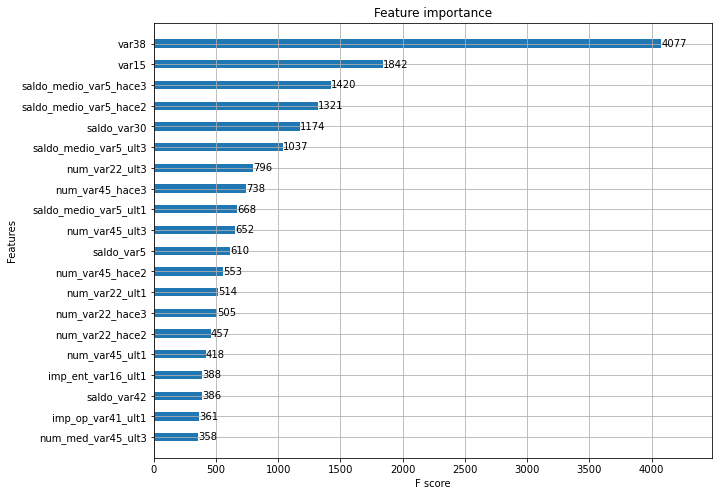

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

## LightGBM 모델 학습과 하이퍼파라미터 튜닝

### 학습 & AUC값 계산

In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


### 하이퍼파라미터 튜닝

In [17]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	va

[36]	valid_0's auc: 0.87885	valid_0's binary_logloss: 0.122635	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.139347
[37]	valid_0's auc: 0.879609	valid_0's binary_logloss: 0.12236	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139342
[38]	valid_0's auc: 0.879941	valid_0's binary_logloss: 0.12211	valid_1's auc: 0.838586	valid_1's binary_logloss: 0.139438
[39]	valid_0's auc: 0.880723	valid_0's binary_logloss: 0.121864	valid_1's auc: 0.838655	valid_1's binary_logloss: 0.139421
[40]	valid_0's auc: 0.881052	valid_0's binary_logloss: 0.121708	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.139358
[41]	valid_0's auc: 0.881719	valid_0's binary_logloss: 0.12146	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.139353
[42]	valid_0's auc: 0.882841	valid_0's binary_logloss: 0.121168	valid_1's auc: 0.83955	valid_1's binary_logloss: 0.139266
[43]	valid_0's auc: 0.883416	valid_0's binary_logloss: 0.120936	valid_1's auc: 0.839046	valid_1's binary_logloss: 0.139368
[44]	valid_0's auc: 0.88

[35]	valid_0's auc: 0.876685	valid_0's binary_logloss: 0.123227	valid_1's auc: 0.837767	valid_1's binary_logloss: 0.139632
[36]	valid_0's auc: 0.877273	valid_0's binary_logloss: 0.122984	valid_1's auc: 0.837941	valid_1's binary_logloss: 0.139635
[37]	valid_0's auc: 0.877868	valid_0's binary_logloss: 0.12276	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139578
[38]	valid_0's auc: 0.878325	valid_0's binary_logloss: 0.122494	valid_1's auc: 0.83832	valid_1's binary_logloss: 0.139527
[39]	valid_0's auc: 0.878917	valid_0's binary_logloss: 0.122248	valid_1's auc: 0.838503	valid_1's binary_logloss: 0.139516
[40]	valid_0's auc: 0.879406	valid_0's binary_logloss: 0.122038	valid_1's auc: 0.838825	valid_1's binary_logloss: 0.139475
[41]	valid_0's auc: 0.87982	valid_0's binary_logloss: 0.121865	valid_1's auc: 0.838607	valid_1's binary_logloss: 0.139525
[42]	valid_0's auc: 0.880217	valid_0's binary_logloss: 0.121697	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.139582
[43]	valid_0's auc: 

[13]	valid_0's auc: 0.858514	valid_0's binary_logloss: 0.131563	valid_1's auc: 0.837281	valid_1's binary_logloss: 0.142655
[14]	valid_0's auc: 0.859381	valid_0's binary_logloss: 0.130866	valid_1's auc: 0.836814	valid_1's binary_logloss: 0.142234
[15]	valid_0's auc: 0.860107	valid_0's binary_logloss: 0.130265	valid_1's auc: 0.837227	valid_1's binary_logloss: 0.141784
[16]	valid_0's auc: 0.861293	valid_0's binary_logloss: 0.129652	valid_1's auc: 0.837155	valid_1's binary_logloss: 0.141436
[17]	valid_0's auc: 0.862801	valid_0's binary_logloss: 0.129	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.141233
[18]	valid_0's auc: 0.864095	valid_0's binary_logloss: 0.128456	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.140968
[19]	valid_0's auc: 0.864873	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837462	valid_1's binary_logloss: 0.140684
[20]	valid_0's auc: 0.866514	valid_0's binary_logloss: 0.127475	valid_1's auc: 0.837791	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc:

[12]	valid_0's auc: 0.854509	valid_0's binary_logloss: 0.132621	valid_1's auc: 0.838172	valid_1's binary_logloss: 0.143406
[13]	valid_0's auc: 0.856837	valid_0's binary_logloss: 0.131801	valid_1's auc: 0.838172	valid_1's binary_logloss: 0.142845
[14]	valid_0's auc: 0.858379	valid_0's binary_logloss: 0.131085	valid_1's auc: 0.838161	valid_1's binary_logloss: 0.142438
[15]	valid_0's auc: 0.859828	valid_0's binary_logloss: 0.130403	valid_1's auc: 0.837333	valid_1's binary_logloss: 0.142128
[16]	valid_0's auc: 0.861034	valid_0's binary_logloss: 0.129848	valid_1's auc: 0.836715	valid_1's binary_logloss: 0.141806
[17]	valid_0's auc: 0.861775	valid_0's binary_logloss: 0.129299	valid_1's auc: 0.837193	valid_1's binary_logloss: 0.141398
[18]	valid_0's auc: 0.862844	valid_0's binary_logloss: 0.128797	valid_1's auc: 0.837688	valid_1's binary_logloss: 0.141105
[19]	valid_0's auc: 0.864183	valid_0's binary_logloss: 0.128254	valid_1's auc: 0.838493	valid_1's binary_logloss: 0.1408
[20]	valid_0's auc

[25]	valid_0's auc: 0.885463	valid_0's binary_logloss: 0.120698	valid_1's auc: 0.828588	valid_1's binary_logloss: 0.141833
[26]	valid_0's auc: 0.886554	valid_0's binary_logloss: 0.120291	valid_1's auc: 0.8285	valid_1's binary_logloss: 0.141817
[27]	valid_0's auc: 0.887374	valid_0's binary_logloss: 0.119825	valid_1's auc: 0.828014	valid_1's binary_logloss: 0.141826
[28]	valid_0's auc: 0.888077	valid_0's binary_logloss: 0.11942	valid_1's auc: 0.827886	valid_1's binary_logloss: 0.14177
[29]	valid_0's auc: 0.888773	valid_0's binary_logloss: 0.119041	valid_1's auc: 0.827921	valid_1's binary_logloss: 0.141763
[30]	valid_0's auc: 0.889591	valid_0's binary_logloss: 0.118672	valid_1's auc: 0.828616	valid_1's binary_logloss: 0.141616
[31]	valid_0's auc: 0.889981	valid_0's binary_logloss: 0.118339	valid_1's auc: 0.828525	valid_1's binary_logloss: 0.141555
[32]	valid_0's auc: 0.891237	valid_0's binary_logloss: 0.117949	valid_1's auc: 0.828309	valid_1's binary_logloss: 0.141603
[33]	valid_0's auc: 

[10]	valid_0's auc: 0.86448	valid_0's binary_logloss: 0.131312	valid_1's auc: 0.836102	valid_1's binary_logloss: 0.144368
[11]	valid_0's auc: 0.86587	valid_0's binary_logloss: 0.130164	valid_1's auc: 0.836347	valid_1's binary_logloss: 0.14376
[12]	valid_0's auc: 0.867975	valid_0's binary_logloss: 0.129168	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143155
[13]	valid_0's auc: 0.870558	valid_0's binary_logloss: 0.128157	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.142684
[14]	valid_0's auc: 0.872242	valid_0's binary_logloss: 0.127255	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.142312
[15]	valid_0's auc: 0.873758	valid_0's binary_logloss: 0.126426	valid_1's auc: 0.836377	valid_1's binary_logloss: 0.14194
[16]	valid_0's auc: 0.875262	valid_0's binary_logloss: 0.125659	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.141765
[17]	valid_0's auc: 0.876886	valid_0's binary_logloss: 0.124929	valid_1's auc: 0.835566	valid_1's binary_logloss: 0.141548
[18]	valid_0's auc: 

[35]	valid_0's auc: 0.893036	valid_0's binary_logloss: 0.116984	valid_1's auc: 0.827162	valid_1's binary_logloss: 0.141867
[36]	valid_0's auc: 0.893952	valid_0's binary_logloss: 0.116643	valid_1's auc: 0.82722	valid_1's binary_logloss: 0.141919
[37]	valid_0's auc: 0.894628	valid_0's binary_logloss: 0.116343	valid_1's auc: 0.827088	valid_1's binary_logloss: 0.141964
[38]	valid_0's auc: 0.895063	valid_0's binary_logloss: 0.11609	valid_1's auc: 0.827376	valid_1's binary_logloss: 0.141947
[39]	valid_0's auc: 0.895511	valid_0's binary_logloss: 0.115776	valid_1's auc: 0.826977	valid_1's binary_logloss: 0.142035
[40]	valid_0's auc: 0.895873	valid_0's binary_logloss: 0.115526	valid_1's auc: 0.827266	valid_1's binary_logloss: 0.142022
Early stopping, best iteration is:
[10]	valid_0's auc: 0.865388	valid_0's binary_logloss: 0.131436	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.145006
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logl

[16]	valid_0's auc: 0.875262	valid_0's binary_logloss: 0.125659	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.141765
[17]	valid_0's auc: 0.876886	valid_0's binary_logloss: 0.124929	valid_1's auc: 0.835566	valid_1's binary_logloss: 0.141548
[18]	valid_0's auc: 0.878549	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.835682	valid_1's binary_logloss: 0.141281
[19]	valid_0's auc: 0.880422	valid_0's binary_logloss: 0.12357	valid_1's auc: 0.835543	valid_1's binary_logloss: 0.141181
[20]	valid_0's auc: 0.881339	valid_0's binary_logloss: 0.123016	valid_1's auc: 0.835789	valid_1's binary_logloss: 0.140981
[21]	valid_0's auc: 0.882595	valid_0's binary_logloss: 0.12242	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.140807
[22]	valid_0's auc: 0.883944	valid_0's binary_logloss: 0.121854	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.140685
[23]	valid_0's auc: 0.884786	valid_0's binary_logloss: 0.121312	valid_1's auc: 0.835988	valid_1's binary_logloss: 0.140658
[24]	valid_0's auc:

[27]	valid_0's auc: 0.869684	valid_0's binary_logloss: 0.126031	valid_1's auc: 0.837221	valid_1's binary_logloss: 0.140054
[28]	valid_0's auc: 0.870355	valid_0's binary_logloss: 0.125747	valid_1's auc: 0.837362	valid_1's binary_logloss: 0.13997
[29]	valid_0's auc: 0.871186	valid_0's binary_logloss: 0.12547	valid_1's auc: 0.837231	valid_1's binary_logloss: 0.139918
[30]	valid_0's auc: 0.871902	valid_0's binary_logloss: 0.125224	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139873
[31]	valid_0's auc: 0.872311	valid_0's binary_logloss: 0.124989	valid_1's auc: 0.83717	valid_1's binary_logloss: 0.139847
[32]	valid_0's auc: 0.872917	valid_0's binary_logloss: 0.12477	valid_1's auc: 0.837439	valid_1's binary_logloss: 0.139784
[33]	valid_0's auc: 0.873431	valid_0's binary_logloss: 0.12454	valid_1's auc: 0.837452	valid_1's binary_logloss: 0.139749
[34]	valid_0's auc: 0.874128	valid_0's binary_logloss: 0.124274	valid_1's auc: 0.837524	valid_1's binary_logloss: 0.139762
[35]	valid_0's auc: 0

[11]	valid_0's auc: 0.851824	valid_0's binary_logloss: 0.133929	valid_1's auc: 0.83854	valid_1's binary_logloss: 0.1437
[12]	valid_0's auc: 0.853454	valid_0's binary_logloss: 0.133039	valid_1's auc: 0.839037	valid_1's binary_logloss: 0.143056
[13]	valid_0's auc: 0.854721	valid_0's binary_logloss: 0.132319	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.142504
[14]	valid_0's auc: 0.85546	valid_0's binary_logloss: 0.131677	valid_1's auc: 0.838268	valid_1's binary_logloss: 0.142058
[15]	valid_0's auc: 0.856819	valid_0's binary_logloss: 0.131046	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.141834
[16]	valid_0's auc: 0.857561	valid_0's binary_logloss: 0.130517	valid_1's auc: 0.83725	valid_1's binary_logloss: 0.141464
[17]	valid_0's auc: 0.858305	valid_0's binary_logloss: 0.129992	valid_1's auc: 0.837057	valid_1's binary_logloss: 0.141205
[18]	valid_0's auc: 0.859993	valid_0's binary_logloss: 0.129467	valid_1's auc: 0.836921	valid_1's binary_logloss: 0.140976
[19]	valid_0's auc: 0

[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827905	valid_0's binary_logloss: 0.151337	valid_1's auc: 0.82145	valid_1's binary_logloss: 0.160211
[3]	valid_0's auc: 0.837862	valid_0's binary_logloss: 0.147478	valid_1's auc: 0.828696	valid_1's binary_logloss: 0.156489
[4]	valid_0's auc: 0.840611	valid_0's binary_logloss: 0.144436	valid_1's auc: 0.831962	valid_1's binary_logloss: 0.153536
[5]	valid_0's auc: 0.843113	valid_0's binary_logloss: 0.142075	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.151214
[6]	valid_0's auc: 0.84374	valid_0's binary_logloss: 0.140098	valid_1's auc: 0.834377	valid_1's binary_logloss: 0.149386
[7]	valid_0's auc: 0.845284	valid_0's binary_logloss: 0.138482	valid_1's auc: 0.835936	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.847226	valid_0's binary_logloss: 0.137121	valid_1's auc: 0.836079	v

[69]	valid_0's auc: 0.887954	valid_0's binary_logloss: 0.11833	valid_1's auc: 0.83787	valid_1's binary_logloss: 0.139867
[70]	valid_0's auc: 0.888114	valid_0's binary_logloss: 0.118209	valid_1's auc: 0.837718	valid_1's binary_logloss: 0.139919
[71]	valid_0's auc: 0.888481	valid_0's binary_logloss: 0.118049	valid_1's auc: 0.837821	valid_1's binary_logloss: 0.139893
[72]	valid_0's auc: 0.888835	valid_0's binary_logloss: 0.117903	valid_1's auc: 0.837731	valid_1's binary_logloss: 0.139952
[73]	valid_0's auc: 0.889134	valid_0's binary_logloss: 0.117758	valid_1's auc: 0.837899	valid_1's binary_logloss: 0.139962
[74]	valid_0's auc: 0.889144	valid_0's binary_logloss: 0.117691	valid_1's auc: 0.83792	valid_1's binary_logloss: 0.13998
[75]	valid_0's auc: 0.889275	valid_0's binary_logloss: 0.117578	valid_1's auc: 0.838045	valid_1's binary_logloss: 0.139953
[76]	valid_0's auc: 0.88948	valid_0's binary_logloss: 0.117479	valid_1's auc: 0.837718	valid_1's binary_logloss: 0.140036
[77]	valid_0's auc: 0

[10]	valid_0's auc: 0.866558	valid_0's binary_logloss: 0.132065	valid_1's auc: 0.838732	valid_1's binary_logloss: 0.143753
[11]	valid_0's auc: 0.867378	valid_0's binary_logloss: 0.131005	valid_1's auc: 0.838939	valid_1's binary_logloss: 0.142985
[12]	valid_0's auc: 0.868402	valid_0's binary_logloss: 0.130046	valid_1's auc: 0.837922	valid_1's binary_logloss: 0.142418
[13]	valid_0's auc: 0.869713	valid_0's binary_logloss: 0.12914	valid_1's auc: 0.838282	valid_1's binary_logloss: 0.141868
[14]	valid_0's auc: 0.870702	valid_0's binary_logloss: 0.128307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.141374
[15]	valid_0's auc: 0.871975	valid_0's binary_logloss: 0.127523	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.140933
[16]	valid_0's auc: 0.873071	valid_0's binary_logloss: 0.126793	valid_1's auc: 0.838163	valid_1's binary_logloss: 0.140591
[17]	valid_0's auc: 0.874334	valid_0's binary_logloss: 0.126108	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.140362
[18]	valid_0's auc

[37]	valid_0's auc: 0.893202	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.835858	valid_1's binary_logloss: 0.140014
[38]	valid_0's auc: 0.893881	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140116
[39]	valid_0's auc: 0.89439	valid_0's binary_logloss: 0.11671	valid_1's auc: 0.8355	valid_1's binary_logloss: 0.140166
[40]	valid_0's auc: 0.894767	valid_0's binary_logloss: 0.116439	valid_1's auc: 0.835564	valid_1's binary_logloss: 0.140175
[41]	valid_0's auc: 0.895261	valid_0's binary_logloss: 0.116161	valid_1's auc: 0.835399	valid_1's binary_logloss: 0.140228
[42]	valid_0's auc: 0.895782	valid_0's binary_logloss: 0.115888	valid_1's auc: 0.835369	valid_1's binary_logloss: 0.14032
[43]	valid_0's auc: 0.895994	valid_0's binary_logloss: 0.115655	valid_1's auc: 0.835382	valid_1's binary_logloss: 0.140379
[44]	valid_0's auc: 0.896287	valid_0's binary_logloss: 0.115426	valid_1's auc: 0.835169	valid_1's binary_logloss: 0.140406
[45]	valid_0's auc: 0

[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842991	valid_0's binary_logloss: 0.150276	valid_1's auc: 0.827907	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851825	valid_0's binary_logloss: 0.146251	valid_1's auc: 0.832413	valid_1's binary_logloss: 0.155739
[4]	valid_0's auc: 0.854455	valid_0's binary_logloss: 0.143091	valid_1's auc: 0.833987	valid_1's binary_logloss: 0.15282
[5]	valid_0's auc: 0.857038	valid_0's binary_logloss: 0.140521	valid_1's auc: 0.836024	valid_1's binary_logloss: 0.150456
[6]	valid_0's auc: 0.859784	valid_0's binary_logloss: 0.138303	valid_1's auc: 0.836565	valid_1's binary_logloss: 0.148558
[7]	valid_0's auc: 0.861991	valid_0's binary_logloss: 0.13638	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.147071
[8]	valid_0's auc: 0.863742	valid_0's binary_logloss: 0.134702	valid_1's auc: 0.837366	

[28]	valid_0's auc: 0.886325	valid_0's binary_logloss: 0.120555	valid_1's auc: 0.837376	valid_1's binary_logloss: 0.139864
[29]	valid_0's auc: 0.887055	valid_0's binary_logloss: 0.120163	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.139938
[30]	valid_0's auc: 0.887923	valid_0's binary_logloss: 0.119761	valid_1's auc: 0.836813	valid_1's binary_logloss: 0.13991
[31]	valid_0's auc: 0.888783	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.836207	valid_1's binary_logloss: 0.139954
[32]	valid_0's auc: 0.889881	valid_0's binary_logloss: 0.118999	valid_1's auc: 0.836409	valid_1's binary_logloss: 0.139895
[33]	valid_0's auc: 0.890577	valid_0's binary_logloss: 0.118666	valid_1's auc: 0.836063	valid_1's binary_logloss: 0.139943
[34]	valid_0's auc: 0.891155	valid_0's binary_logloss: 0.118351	valid_1's auc: 0.836137	valid_1's binary_logloss: 0.139964
[35]	valid_0's auc: 0.891785	valid_0's binary_logloss: 0.118001	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.139945
[36]	valid_0's auc

[36]	valid_0's auc: 0.877822	valid_0's binary_logloss: 0.122827	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.140161
[37]	valid_0's auc: 0.87835	valid_0's binary_logloss: 0.122582	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.140133
[38]	valid_0's auc: 0.878728	valid_0's binary_logloss: 0.122378	valid_1's auc: 0.833827	valid_1's binary_logloss: 0.140119
[39]	valid_0's auc: 0.879195	valid_0's binary_logloss: 0.122177	valid_1's auc: 0.833696	valid_1's binary_logloss: 0.140111
Early stopping, best iteration is:
[9]	valid_0's auc: 0.850098	valid_0's binary_logloss: 0.135283	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.144934
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827202	valid_0's binary_logloss: 0.151081	valid_1's auc: 0.819989	valid_1's binary_logloss: 0.160086
[3]	valid_0's auc: 0.836893	valid_0's binary_log

[67]	valid_0's auc: 0.891558	valid_0's binary_logloss: 0.117199	valid_1's auc: 0.837884	valid_1's binary_logloss: 0.139951
[68]	valid_0's auc: 0.891842	valid_0's binary_logloss: 0.117047	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139964
[69]	valid_0's auc: 0.892333	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140006
[70]	valid_0's auc: 0.892833	valid_0's binary_logloss: 0.116695	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.139965
[71]	valid_0's auc: 0.892846	valid_0's binary_logloss: 0.116607	valid_1's auc: 0.837642	valid_1's binary_logloss: 0.140063
[72]	valid_0's auc: 0.892948	valid_0's binary_logloss: 0.116525	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.140129
Early stopping, best iteration is:
[42]	valid_0's auc: 0.882841	valid_0's binary_logloss: 0.121168	valid_1's auc: 0.83955	valid_1's binary_logloss: 0.139266
[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_lo

[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	valid_1's binary_logloss: 0.14601
[9]	valid_0's auc: 0.850098	valid_0's binary_logloss: 0.135283	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.144934
[10]	valid_0's auc: 0.852202	valid_0's binary_logloss: 0.134195	valid_1's auc: 0.840094	valid_1's binary_logloss: 0.144075
[11]	valid_0's auc: 0.853608	valid_0's binary_logloss: 0.133246	valid_1's auc: 0.839532	valid_1's binary_logloss: 0.143371
[12]	valid_0's auc: 0.854898	valid_0's binary_logloss: 0.132408	valid_1's auc: 0.838961	valid_1's binary_logloss: 0.142828
[13]	valid_0's auc: 0.855877	valid_0's binary_logloss: 0.131678	valid_1's auc: 0.839079	valid_1's binary_logloss: 0.142265
[14]	valid_0's auc: 0.857256	valid_0's binary_logloss: 0.130972	valid_1's auc: 0.838458	valid_1's binary_logloss: 0.14192
[15]	valid_0's auc: 0.

[36]	valid_0's auc: 0.87885	valid_0's binary_logloss: 0.122635	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.139347
[37]	valid_0's auc: 0.879609	valid_0's binary_logloss: 0.12236	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139342
[38]	valid_0's auc: 0.879941	valid_0's binary_logloss: 0.12211	valid_1's auc: 0.838586	valid_1's binary_logloss: 0.139438
[39]	valid_0's auc: 0.880723	valid_0's binary_logloss: 0.121864	valid_1's auc: 0.838655	valid_1's binary_logloss: 0.139421
[40]	valid_0's auc: 0.881052	valid_0's binary_logloss: 0.121708	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.139358
[41]	valid_0's auc: 0.881719	valid_0's binary_logloss: 0.12146	valid_1's auc: 0.83903	valid_1's binary_logloss: 0.139353
[42]	valid_0's auc: 0.882841	valid_0's binary_logloss: 0.121168	valid_1's auc: 0.83955	valid_1's binary_logloss: 0.139266
[43]	valid_0's auc: 0.883416	valid_0's binary_logloss: 0.120936	valid_1's auc: 0.839046	valid_1's binary_logloss: 0.139368
[44]	valid_0's auc: 0.88

[31]	valid_0's auc: 0.874202	valid_0's binary_logloss: 0.124188	valid_1's auc: 0.837993	valid_1's binary_logloss: 0.139633
[32]	valid_0's auc: 0.874831	valid_0's binary_logloss: 0.123929	valid_1's auc: 0.837759	valid_1's binary_logloss: 0.139651
[33]	valid_0's auc: 0.87536	valid_0's binary_logloss: 0.123718	valid_1's auc: 0.838121	valid_1's binary_logloss: 0.139601
[34]	valid_0's auc: 0.876098	valid_0's binary_logloss: 0.123446	valid_1's auc: 0.838127	valid_1's binary_logloss: 0.13959
[35]	valid_0's auc: 0.876685	valid_0's binary_logloss: 0.123227	valid_1's auc: 0.837767	valid_1's binary_logloss: 0.139632
[36]	valid_0's auc: 0.877273	valid_0's binary_logloss: 0.122984	valid_1's auc: 0.837941	valid_1's binary_logloss: 0.139635
[37]	valid_0's auc: 0.877868	valid_0's binary_logloss: 0.12276	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139578
[38]	valid_0's auc: 0.878325	valid_0's binary_logloss: 0.122494	valid_1's auc: 0.83832	valid_1's binary_logloss: 0.139527
[39]	valid_0's auc: 0

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841411	valid_0's binary_logloss: 0.14989	valid_1's auc: 0.821568	valid_1's binary_logloss: 0.159541
[3]	valid_0's auc: 0.849517	valid_0's binary_logloss: 0.14572	valid_1's auc: 0.82788	valid_1's binary_logloss: 0.155987
[4]	valid_0's auc: 0.853918	valid_0's binary_logloss: 0.142455	valid_1's auc: 0.830738	valid_1's binary_logloss: 0.153089
[5]	valid_0's auc: 0.857301	valid_0's binary_logloss: 0.139735	valid_1's auc: 0.834385	valid_1's binary_logloss: 0.150632
[6]	valid_0's auc: 0.860317	valid_0's binary_logloss: 0.137505	valid_1's auc: 0.834978	valid_1's binary_logloss: 0.148792
[7]	valid_0's auc: 0.862342	valid_0's binary_logloss: 0.135605	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.147286
[8]	valid_0's auc: 0.863801	valid_0's binary_logloss: 0.133938	valid_1's auc: 0.836233	va

[24]	valid_0's auc: 0.88598	valid_0's binary_logloss: 0.120748	valid_1's auc: 0.83552	valid_1's binary_logloss: 0.140629
[25]	valid_0's auc: 0.887201	valid_0's binary_logloss: 0.120274	valid_1's auc: 0.835925	valid_1's binary_logloss: 0.14052
[26]	valid_0's auc: 0.888423	valid_0's binary_logloss: 0.119775	valid_1's auc: 0.835694	valid_1's binary_logloss: 0.140493
[27]	valid_0's auc: 0.889313	valid_0's binary_logloss: 0.119337	valid_1's auc: 0.835559	valid_1's binary_logloss: 0.140489
[28]	valid_0's auc: 0.890034	valid_0's binary_logloss: 0.118884	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.14046
[29]	valid_0's auc: 0.890803	valid_0's binary_logloss: 0.11848	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.14033
[30]	valid_0's auc: 0.891689	valid_0's binary_logloss: 0.118067	valid_1's auc: 0.835628	valid_1's binary_logloss: 0.140375
[31]	valid_0's auc: 0.892688	valid_0's binary_logloss: 0.117678	valid_1's auc: 0.835223	valid_1's binary_logloss: 0.140399
[32]	valid_0's auc: 0.

[10]	valid_0's auc: 0.867095	valid_0's binary_logloss: 0.131167	valid_1's auc: 0.83568	valid_1's binary_logloss: 0.144312
[11]	valid_0's auc: 0.868321	valid_0's binary_logloss: 0.130032	valid_1's auc: 0.836598	valid_1's binary_logloss: 0.143512
[12]	valid_0's auc: 0.870342	valid_0's binary_logloss: 0.128915	valid_1's auc: 0.836786	valid_1's binary_logloss: 0.142896
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.142313
[14]	valid_0's auc: 0.873492	valid_0's binary_logloss: 0.127074	valid_1's auc: 0.837308	valid_1's binary_logloss: 0.141918
[15]	valid_0's auc: 0.874714	valid_0's binary_logloss: 0.126249	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.141545
[16]	valid_0's auc: 0.876498	valid_0's binary_logloss: 0.125412	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.141306
[17]	valid_0's auc: 0.877697	valid_0's binary_logloss: 0.124674	valid_1's auc: 0.835667	valid_1's binary_logloss: 0.141243
[18]	valid_0's au

[33]	valid_0's auc: 0.894165	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.834973	valid_1's binary_logloss: 0.140407
[34]	valid_0's auc: 0.895202	valid_0's binary_logloss: 0.116504	valid_1's auc: 0.835507	valid_1's binary_logloss: 0.140299
[35]	valid_0's auc: 0.896193	valid_0's binary_logloss: 0.116137	valid_1's auc: 0.835906	valid_1's binary_logloss: 0.140215
[36]	valid_0's auc: 0.896674	valid_0's binary_logloss: 0.115852	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.140177
[37]	valid_0's auc: 0.897433	valid_0's binary_logloss: 0.115534	valid_1's auc: 0.836293	valid_1's binary_logloss: 0.140099
[38]	valid_0's auc: 0.897849	valid_0's binary_logloss: 0.115209	valid_1's auc: 0.835887	valid_1's binary_logloss: 0.140252
[39]	valid_0's auc: 0.898318	valid_0's binary_logloss: 0.114876	valid_1's auc: 0.835559	valid_1's binary_logloss: 0.140398
[40]	valid_0's auc: 0.898626	valid_0's binary_logloss: 0.114599	valid_1's auc: 0.835318	valid_1's binary_logloss: 0.140471
[41]	valid_0's a

[20]	valid_0's auc: 0.863823	valid_0's binary_logloss: 0.128254	valid_1's auc: 0.840096	valid_1's binary_logloss: 0.139974
[21]	valid_0's auc: 0.864524	valid_0's binary_logloss: 0.127855	valid_1's auc: 0.840183	valid_1's binary_logloss: 0.139827
[22]	valid_0's auc: 0.865553	valid_0's binary_logloss: 0.127461	valid_1's auc: 0.840042	valid_1's binary_logloss: 0.139714
[23]	valid_0's auc: 0.866427	valid_0's binary_logloss: 0.127109	valid_1's auc: 0.839501	valid_1's binary_logloss: 0.13974
[24]	valid_0's auc: 0.86716	valid_0's binary_logloss: 0.126769	valid_1's auc: 0.83965	valid_1's binary_logloss: 0.13959
[25]	valid_0's auc: 0.868035	valid_0's binary_logloss: 0.126454	valid_1's auc: 0.839131	valid_1's binary_logloss: 0.139583
[26]	valid_0's auc: 0.869021	valid_0's binary_logloss: 0.126125	valid_1's auc: 0.839022	valid_1's binary_logloss: 0.139492
[27]	valid_0's auc: 0.869695	valid_0's binary_logloss: 0.125839	valid_1's auc: 0.839262	valid_1's binary_logloss: 0.139453
[28]	valid_0's auc: 

[50]	valid_0's auc: 0.882962	valid_0's binary_logloss: 0.121013	valid_1's auc: 0.837347	valid_1's binary_logloss: 0.139684
[51]	valid_0's auc: 0.883328	valid_0's binary_logloss: 0.120868	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.139662
[52]	valid_0's auc: 0.883845	valid_0's binary_logloss: 0.12066	valid_1's auc: 0.838071	valid_1's binary_logloss: 0.139589
[53]	valid_0's auc: 0.884228	valid_0's binary_logloss: 0.120503	valid_1's auc: 0.837994	valid_1's binary_logloss: 0.139593
[54]	valid_0's auc: 0.884403	valid_0's binary_logloss: 0.120376	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.139642
[55]	valid_0's auc: 0.884574	valid_0's binary_logloss: 0.120214	valid_1's auc: 0.838054	valid_1's binary_logloss: 0.139613
[56]	valid_0's auc: 0.885034	valid_0's binary_logloss: 0.120016	valid_1's auc: 0.838201	valid_1's binary_logloss: 0.139564
[57]	valid_0's auc: 0.885329	valid_0's binary_logloss: 0.119848	valid_1's auc: 0.838183	valid_1's binary_logloss: 0.139573
[58]	valid_0's au

[34]	valid_0's auc: 0.873431	valid_0's binary_logloss: 0.12451	valid_1's auc: 0.833313	valid_1's binary_logloss: 0.140097
[35]	valid_0's auc: 0.873806	valid_0's binary_logloss: 0.124316	valid_1's auc: 0.833176	valid_1's binary_logloss: 0.140105
[36]	valid_0's auc: 0.874204	valid_0's binary_logloss: 0.124118	valid_1's auc: 0.833063	valid_1's binary_logloss: 0.140129
[37]	valid_0's auc: 0.874899	valid_0's binary_logloss: 0.1239	valid_1's auc: 0.83378	valid_1's binary_logloss: 0.140005
[38]	valid_0's auc: 0.875362	valid_0's binary_logloss: 0.123685	valid_1's auc: 0.833865	valid_1's binary_logloss: 0.140011
[39]	valid_0's auc: 0.875966	valid_0's binary_logloss: 0.123474	valid_1's auc: 0.833771	valid_1's binary_logloss: 0.139979
[40]	valid_0's auc: 0.876345	valid_0's binary_logloss: 0.123322	valid_1's auc: 0.833508	valid_1's binary_logloss: 0.140044
[41]	valid_0's auc: 0.876848	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.833816	valid_1's binary_logloss: 0.139998
[42]	valid_0's auc: 

[24]	valid_0's auc: 0.866988	valid_0's binary_logloss: 0.127008	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.140316
[25]	valid_0's auc: 0.868263	valid_0's binary_logloss: 0.12663	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140197
[26]	valid_0's auc: 0.868968	valid_0's binary_logloss: 0.126317	valid_1's auc: 0.836987	valid_1's binary_logloss: 0.140127
[27]	valid_0's auc: 0.869684	valid_0's binary_logloss: 0.126031	valid_1's auc: 0.837221	valid_1's binary_logloss: 0.140054
[28]	valid_0's auc: 0.870355	valid_0's binary_logloss: 0.125747	valid_1's auc: 0.837362	valid_1's binary_logloss: 0.13997
[29]	valid_0's auc: 0.871186	valid_0's binary_logloss: 0.12547	valid_1's auc: 0.837231	valid_1's binary_logloss: 0.139918
[30]	valid_0's auc: 0.871902	valid_0's binary_logloss: 0.125224	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139873
[31]	valid_0's auc: 0.872311	valid_0's binary_logloss: 0.124989	valid_1's auc: 0.83717	valid_1's binary_logloss: 0.139847
[32]	valid_0's auc: 

[10]	valid_0's auc: 0.863665	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834967	valid_1's binary_logloss: 0.144698
[11]	valid_0's auc: 0.865337	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835265	valid_1's binary_logloss: 0.144026
[12]	valid_0's auc: 0.86681	valid_0's binary_logloss: 0.130312	valid_1's auc: 0.835596	valid_1's binary_logloss: 0.143395
[13]	valid_0's auc: 0.868736	valid_0's binary_logloss: 0.129392	valid_1's auc: 0.835221	valid_1's binary_logloss: 0.142859
[14]	valid_0's auc: 0.870248	valid_0's binary_logloss: 0.128555	valid_1's auc: 0.835178	valid_1's binary_logloss: 0.142419
[15]	valid_0's auc: 0.87138	valid_0's binary_logloss: 0.127833	valid_1's auc: 0.834834	valid_1's binary_logloss: 0.14216
[16]	valid_0's auc: 0.872373	valid_0's binary_logloss: 0.127151	valid_1's auc: 0.834648	valid_1's binary_logloss: 0.141863
[17]	valid_0's auc: 0.873016	valid_0's binary_logloss: 0.126561	valid_1's auc: 0.83334	valid_1's binary_logloss: 0.141838
[18]	valid_0's auc: 0

[34]	valid_0's auc: 0.892149	valid_0's binary_logloss: 0.118123	valid_1's auc: 0.836389	valid_1's binary_logloss: 0.139504
[35]	valid_0's auc: 0.892998	valid_0's binary_logloss: 0.117793	valid_1's auc: 0.836255	valid_1's binary_logloss: 0.139533
[36]	valid_0's auc: 0.89356	valid_0's binary_logloss: 0.117478	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.139523
[37]	valid_0's auc: 0.894086	valid_0's binary_logloss: 0.117177	valid_1's auc: 0.836152	valid_1's binary_logloss: 0.13956
[38]	valid_0's auc: 0.894901	valid_0's binary_logloss: 0.116796	valid_1's auc: 0.836268	valid_1's binary_logloss: 0.139585
[39]	valid_0's auc: 0.895733	valid_0's binary_logloss: 0.116504	valid_1's auc: 0.836498	valid_1's binary_logloss: 0.139544
[40]	valid_0's auc: 0.896306	valid_0's binary_logloss: 0.116196	valid_1's auc: 0.836675	valid_1's binary_logloss: 0.139553
[41]	valid_0's auc: 0.897067	valid_0's binary_logloss: 0.115849	valid_1's auc: 0.83661	valid_1's binary_logloss: 0.139607
Early stopping, bes

[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841215	valid_0's binary_logloss: 0.150324	valid_1's auc: 0.823632	valid_1's binary_logloss: 0.159859
[3]	valid_0's auc: 0.846402	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.156265
[4]	valid_0's auc: 0.851123	valid_0's binary_logloss: 0.143141	valid_1's auc: 0.830341	valid_1's binary_logloss: 0.153379
[5]	valid_0's auc: 0.853991	valid_0's binary_logloss: 0.140571	valid_1's auc: 0.831329	valid_1's binary_logloss: 0.151129
[6]	valid_0's auc: 0.856674	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.833102	valid_1's binary_logloss: 0.149272
[7]	valid_0's auc: 0.858444	valid_0's binary_logloss: 0.136551	valid_1's auc: 0.833757	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.859496	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834435	

[28]	valid_0's auc: 0.886476	valid_0's binary_logloss: 0.12049	valid_1's auc: 0.837391	valid_1's binary_logloss: 0.139392
[29]	valid_0's auc: 0.887401	valid_0's binary_logloss: 0.120092	valid_1's auc: 0.837142	valid_1's binary_logloss: 0.139389
[30]	valid_0's auc: 0.88847	valid_0's binary_logloss: 0.119653	valid_1's auc: 0.837007	valid_1's binary_logloss: 0.139427
[31]	valid_0's auc: 0.889406	valid_0's binary_logloss: 0.119235	valid_1's auc: 0.837386	valid_1's binary_logloss: 0.13934
[32]	valid_0's auc: 0.890464	valid_0's binary_logloss: 0.118854	valid_1's auc: 0.836872	valid_1's binary_logloss: 0.139395
[33]	valid_0's auc: 0.891323	valid_0's binary_logloss: 0.118486	valid_1's auc: 0.836772	valid_1's binary_logloss: 0.139445
[34]	valid_0's auc: 0.892149	valid_0's binary_logloss: 0.118123	valid_1's auc: 0.836389	valid_1's binary_logloss: 0.139504
[35]	valid_0's auc: 0.892998	valid_0's binary_logloss: 0.117793	valid_1's auc: 0.836255	valid_1's binary_logloss: 0.139533
[36]	valid_0's auc:

### 튜닝 결과로 학습

In [18]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

# 분류실습2 - 신용카드 사기검출

In [20]:
print(np.__version__)
import pandas as pd
print(pd.__version__)

1.15.4


ImportError: this version of pandas is incompatible with numpy < 1.16.5
your numpy version is 1.15.4.
Please upgrade numpy to >= 1.16.5 to use this pandas version

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./data/creditcard.csv')
card_df.head(3)

ImportError: this version of pandas is incompatible with numpy < 1.16.5
your numpy version is 1.15.4.
Please upgrade numpy to >= 1.16.5 to use this pandas version

## 데이터 전처리

In [20]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [21]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [23]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100,'\n')
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64 

테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


class 불균형 심함

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 1차 모델링

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85280    15]
 [   58    90]]
정확도: 0.9991, 정밀도: 0.8571, 재현율: 0.6081,    F1: 0.7115, AUC:0.9519


### LightGBM

In [26]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [27]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9797


## 데이터 분포도 변환 후 모델 학습/예측/평가

### Amount 변수

Amount: 신용카드 사용 금액 (Y를 결정하는 중요한 속성일 가능성 높음)

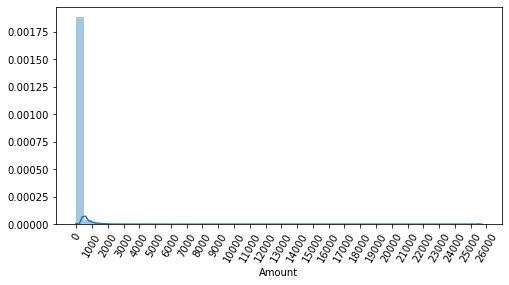

In [28]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

대부분 1000불 이하.

#### 정규화

In [29]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [30]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9773


성능 크게 개선되지 않음

#### 로그 변환

In [31]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [32]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9786


성능 약간 개선됨 (정밀도, 재현율, ROC-AUC)

## 이상치 데이터 제거 후 모델 학습/예측/평가

모든 변수의 이상치를 제거하기 힘드니, Y(class)와 상관관계가 높은 변수의 이상치만 제거

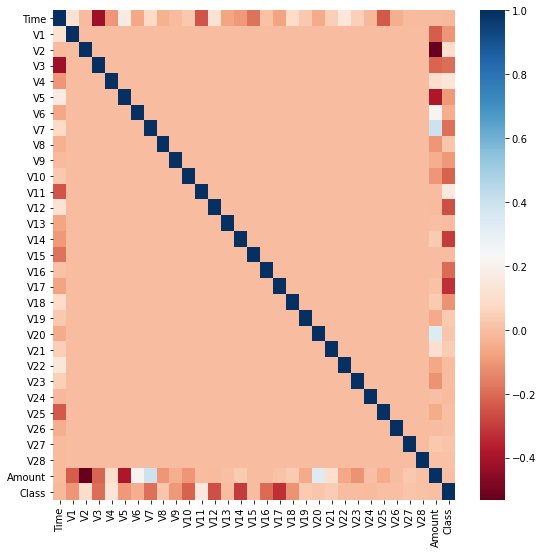

In [33]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

V14, V17의 상관관계 가장 높음

### V14 이상치 제거 (IQR 사용)

In [36]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud<lowest_val) | (fraud>highest_val)].index
    
    return outlier_index

In [37]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [38]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9831


성능 크게 향상됨 (재현율)

## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [4]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (455, 30) (455,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (580, 30) (580,)


NameError: name 'pd' is not defined

In [ ]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

재현율 크게 향상, 정밀도 크게 저하됨 => 문제 시각화

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


In [ ]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)ㅠ

재현율 높아짐, 정밀도 낮아짐.

# 스태킹 앙상블

- Stacking: 앙상블 알고리즘의 일종. 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측 수행
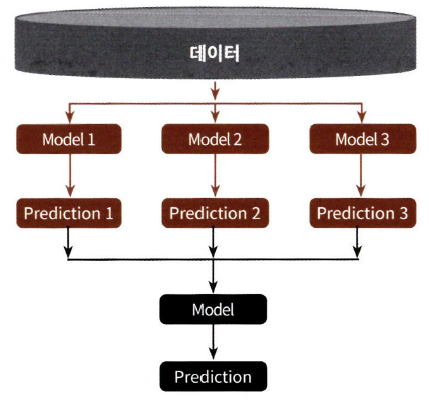
- 개발 기반 모델 + 최종 메타 모델

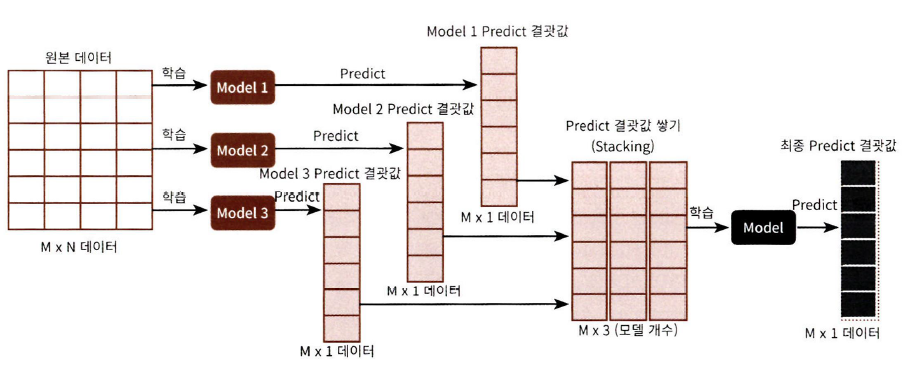
- M개의 행: 데이터 수
- N개의 열: 피처 수
- 3개의 개별 ML 알고리즘을 사용하여 각각 학습 및 예측을 시킴 => 각 모델에서 M개의 데이터만큼의 예측 결과가 나옴 (Mx1)
- 각 모델의 결과를 합하여 (Mx1 + Mx1 + Mx1 = Mx3) 만들어진 데이터셋에 최종 모델을 적용해 최종 예측을 함

## 기본 스태킹 모델

In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

C:\Users\Hyunjung\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Hyunjung\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


### 개별 모델

In [2]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [3]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [5]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561 :


### 최종 메타 모델

개별 알고리즘으로부터 예측된 예측값(Mx1) 4개를 붙여 Mx4 (4개의 피처)를 만들고, 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용

In [6]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [8]:
lr_final.fit(pred, y_test) # 테스트용 데이터를 이용하여 학습
final = lr_final.predict(pred) #예측
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final))) #테스트용 데이터를 이용하여 정확도 계산

최종 메타 모델의 예측 정확도: 0.9737


__개별 모델 정확도보다 향상됨__

## CV 세트 기반의 스태킹

- 과적합 개선 위해 각 개별 모델에 CV 사용하여 메타 모델위한 데이터 생성

__<방법>__
- __Step1__: 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성
    - (개별 모델별로) 학습용 데이터를 N(N=3)개의 Fold로 나눔
        1. 첫 번째 반복
            ![284_1](./image/284_1.png)
        2. 두 번째 반복
            ![284_2](./image/284_2.png)
        3. 세 번째 반복
            ![285_1](./image/285_1.png)
    - 각 모델에 대해 위의 과정 실행
    
    
- __Step2__
    - Step1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 => 메타 모델이 학습할 최종 학습용 데이터셋 생성
    - Step1에서 개별 모델들이 생성한 테스트용 데이터를 모두 스태킹 => 메타 모델이 학습할 최종 테스트용 데이터셋 생성
    
    
- __전체 프로세스__
![285_2](./image/285_2.png)

### Step1: 개별 모델

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [10]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


### Step2: 최종 메타 모델

각 모델별 학습 데이터 합치기, 각 모델별 테스트 데이터 합치기

In [15]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '\n원본 테스트 피처 Shape:',X_test.shape, '\n')
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape, 
      '\n스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 
원본 테스트 피처 Shape: (114, 30) 

스태킹 학습 피처 데이터 Shape: (455, 4) 
스태킹 테스트 피처 데이터 Shape: (114, 4)


In [12]:
## (cv세트 기반의 스태킹 모델)

lr_final.fit(Stack_final_X_train, y_train) #학습용 데이터를 이용하여 학습
stack_final = lr_final.predict(Stack_final_X_test) #예측

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final))) #테스트용 데이터를 이용하여 정확도 계산

최종 메타 모델의 예측 정확도: 0.9737


- 하이퍼파라미터 튜닝: 일반적으로는 개별 모델 내에서 하이퍼파라미터 튜닝을 통한 최적 하이퍼파라미터 선정 후 스태킹 모델 생성
- 분류뿐만이 아닌 회귀에서도 적용 가능